In [1]:
%pylab inline
from pyndamics3 import Simulation

Populating the interactive namespace from numpy and matplotlib
pyndamics3  version  0.0.12


<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/29728a7d4bebe8197dca7d873d81b9dce954522e">

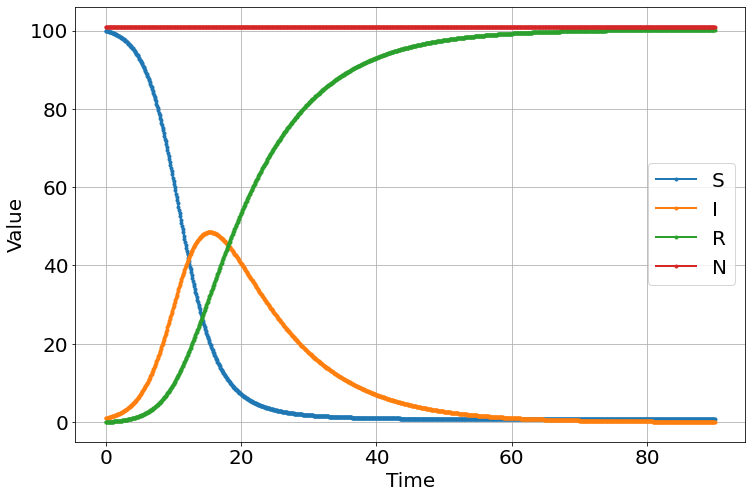

<Figure size 864x576 with 0 Axes>

In [20]:
sim=Simulation()
sim.add("S' = -β*S*I/N",100,plot=1)
sim.add("I' = +β*S*I/N - γ*I",1,plot=1)
sim.add("R' = +γ*I",plot=1)
sim.add("N = S+I+R",plot=1)

sim.params(β=.5,γ=.1)
sim.run(90)

In [21]:
t_data=[10,20,30,40,50]
I_data=[30,45,18,8,2]

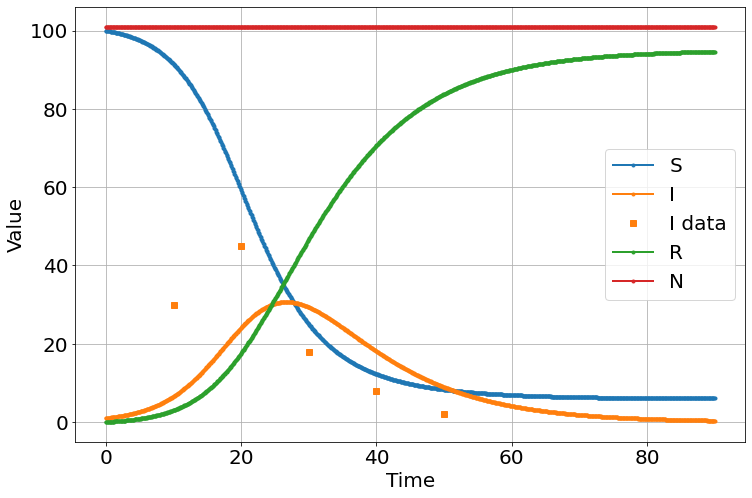

<Figure size 864x576 with 0 Axes>

In [22]:
sim=Simulation()
sim.add("S' = -β*S*I/N",100,plot=1)
sim.add("I' = +β*S*I/N - γ*I",1,plot=1)
sim.add("R' = +γ*I",plot=1)
sim.add("N = S+I+R",plot=1)

sim.add_data(t=t_data,I=I_data,plot=1)
sim.params(β=.3,γ=.1)
sim.run(90)

In [23]:
from pyndamics3.mcmc import *

In [24]:
model=MCMCModel(sim,
               β=Uniform(0,2),
               γ=Uniform(0,2),)

Sampling Prior...
Done.
0.33 s
Running MCMC 1/4...
Done.
1 m, 17.91 s
Running MCMC 2/4...
Done.
1 m, 31.02 s
Running MCMC 3/4...
Done.
1 m, 30.67 s
Running MCMC 4/4...
Done.
1 m, 34.46 s


<Figure size 864x576 with 0 Axes>

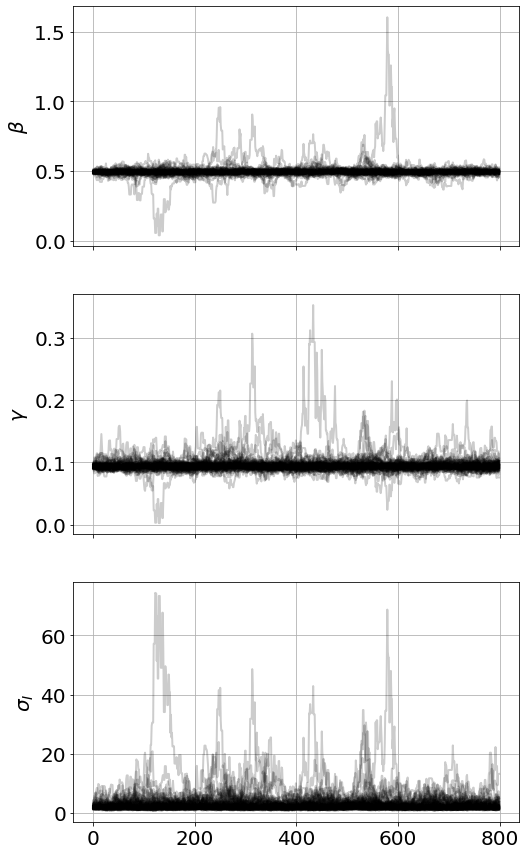

In [25]:
model.run_mcmc(800,repeat=4)
model.plot_chains()

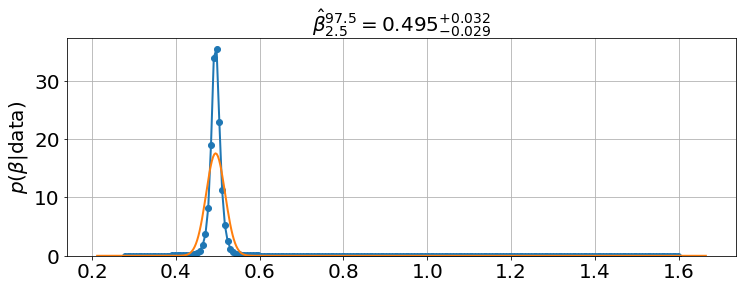

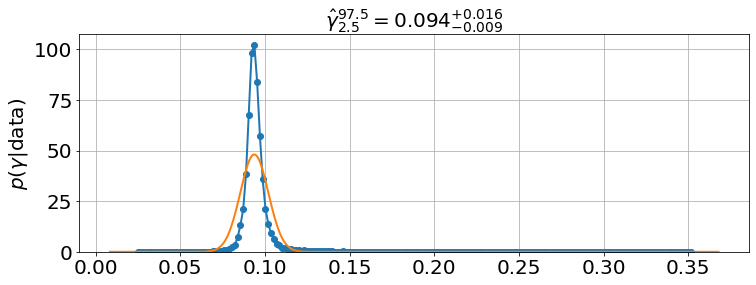

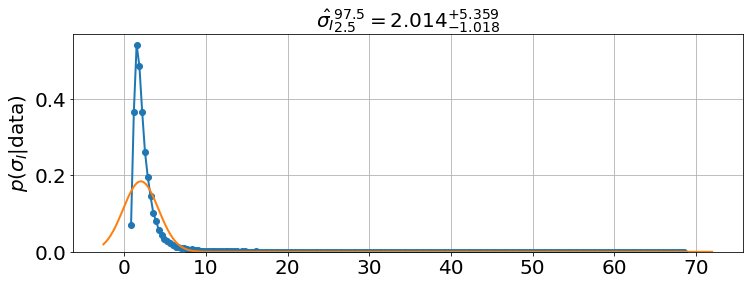

In [26]:
model.plot_distributions()